# Fast and Robust Edge Extraction in Unorganized Point Clouds

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyntcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.3/346.3 kB 8.1 MB/s eta 0:00:00


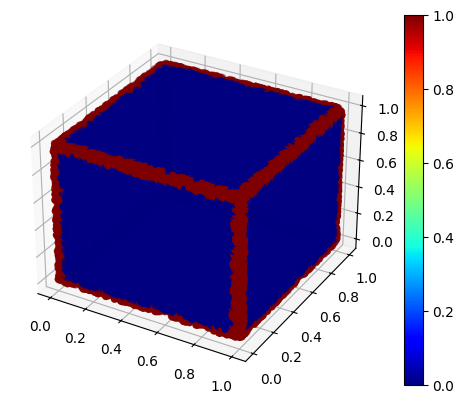

CPU times: user 4.83 s, sys: 224 ms, total: 5.05 s
Wall time: 9.63 s


/usr/local/lib/python3.11/dist-packages/pyntcloud/io/ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = property_formats[str(df.dtypes[i])[0]]
/usr/local/lib/python3.11/dist-packages/pyntcloud/io/ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = property_formats[str(df.dtypes[i])[0]]
/usr/local/lib/python3.11/dist-packages/pyntcloud/io/ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = property_form

In [4]:
%%time
from pyntcloud import PyntCloud
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import pdb

pcd1 = PyntCloud.from_file("/content/drive/MyDrive/Edge and Corner Detection in Unorganized Point Clouds/ArtificialPointClouds/Cube30KSharpEdge.pcd")
#pcd1 = PyntCloud.from_file("/TetrahedronMultiple.pcd")
#pcd1 = PyntCloud.from_file("/ArtificialPointClouds/CubeFractal2.pcd")
output_dir = "./detected_edge/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# define hyperparameters
k_n = 50
thresh = 0.03

pcd_np = np.zeros((len(pcd1.points),6))

# find neighbors
kdtree_id = pcd1.add_structure("kdtree")
k_neighbors = pcd1.get_neighbors(k=k_n, kdtree=kdtree_id)

# calculate eigenvalues
ev = pcd1.add_scalar_field("eigen_values", k_neighbors=k_neighbors)

x = pcd1.points['x'].values
y = pcd1.points['y'].values
z = pcd1.points['z'].values

e1 = pcd1.points['e3('+str(k_n+1)+')'].values
e2 = pcd1.points['e2('+str(k_n+1)+')'].values
e3 = pcd1.points['e1('+str(k_n+1)+')'].values

sum_eg = np.add(np.add(e1,e2),e3)
sigma = np.divide(e1,sum_eg)
sigma_value = sigma
#pdb.set_trace()
#img = ax.scatter(x, y, z, c=sigma, cmap='jet')

# visualize the edges
sigma = sigma>thresh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize each one of the eigenvalues
#img = ax.scatter(x, y, z, c=e1, cmap='jet')
#img = ax.scatter(x, y, z, c=e2, cmap='jet')
#img = ax.scatter(x, y, z, c=e3, cmap='jet')

# visualize the edges
img = ax.scatter(x, y, z, c=sigma, cmap='jet')
#img = ax.scatter(x, y, z, c=sigma, cmap=plt.hot())

fig.colorbar(img)
plt.show()

# Save the edges and point cloud
thresh_min = sigma_value < thresh
sigma_value[thresh_min] = 0
thresh_max = sigma_value > thresh
sigma_value[thresh_max] = 255

pcd_np[:,0] = x
pcd_np[:,1] = y
pcd_np[:,2] = z
pcd_np[:,3] = sigma_value

edge_np = np.delete(pcd_np, np.where(pcd_np[:,3] == 0), axis=0)

clmns = ['x','y','z','red','green','blue']
pcd_pd = pd.DataFrame(data=pcd_np,columns=clmns)
pcd_pd['red'] = sigma_value.astype(np.uint8)

#pcd_points = PyntCloud(pd.DataFrame(data=pcd_np,columns=clmns))
pcd_points = PyntCloud(pcd_pd)
edge_points = PyntCloud(pd.DataFrame(data=edge_np,columns=clmns))

# pcd_points.plot()
# edge_points.plot()

PyntCloud.to_file(pcd_points,output_dir+'pointcloud_edges.ply')   # Save the whole point cloud by painting the edge points
PyntCloud.to_file(edge_points,output_dir+'edges.ply')             # Save just the edge points



> Bazazian, D., Casas, J. R., & Ruiz-Hidalgo, J. (2015). Fast and Robust Edge Extraction in Unorganized Point Clouds.

